#### Handling Imbalanced Dataset with Machine Learning

In [ ]:
import pandas as pd
df=pd.read_csv('ais_disabling_events_main_only_imp_col_csv_exact_ocean_name.csv')
df.head()

,gap_hours,iuu_caught,spherical_distances,eez_check,exact _name new from diff Oceans,gap_x_distance,score,gear type
0,13.016667,0,207.942845,0,North Atlantic Ocean,2706.722700,98,pole_and_line
1,13.850000,0,9.704232,0,South Atlantic Ocean,134.403613,86,fishing
2,33.733333,0,10.789069,1,North Atlantic Ocean,363.951273,94,pole_and_line
3,30.650000,0,11.695860,1,North Atlantic Ocean,358.478097,91,pole_and_line
4,50.283333,0,93.113335,1,North Atlantic Ocean,4682.048839,98,pole_and_line


In [ ]:
df.shape

(55368, 8)

In [ ]:
df['iuu_caught'].value_counts()

0    55129
1      239
Name: iuu_caught, dtype: int64

In [ ]:
#### Independent and Dependent Features
X=df.drop("iuu_caught",axis=1)
y=df.iuu_caught

### One Hot Encoding

In [ ]:
print(df['gear type'].unique())
print(df['exact _name new from diff Oceans'].unique())

['pole_and_line' 'fishing' 'set_longlines' 'fixed_gear' 'set_gillnets'
 'pots_and_traps' 'seiners' 'other_purse_seines' 'purse_seines' 'trollers'
 'dredge_fishing' 'drifting_longlines' 'other' 'trawlers' 'other_seines'
 'squid_jigger' 'tuna_purse_seines']
['North Atlantic Ocean' 'South Atlantic Ocean' 'Celtic Sea'
 'Southern Ocean' 'Mediterranean Sea - Eastern Basin' 'Norwegian Sea'
 'Barentsz Sea' 'Sea of Okhotsk' 'Japan Sea' 'Bering Sea' 'Gulf of Alaska'
 'Labrador Sea' 'Davis Strait' 'North Pacific Ocean' 'South Pacific Ocean'
 'Arafura Sea' 'Arabian Sea' 'Indian Ocean' 'Tasman Sea' 'Bismarck Sea'
 'Gulf of Guinea' 'Coral Sea' 'Bay of Bengal' 'Great Australian Bight'
 'Mozambique Channel' 'Caribbean Sea' 'Philippine Sea' 'Timor Sea'
 'Greenland Sea' 'North Sea' 'Laccadive Sea' 'Bass Strait'
 'Gulf of St. Lawrence' 'Baffin Bay' 'Gulf of Mexico' 'Solomon Sea']


In [ ]:
print(df['gear type'].value_counts())
print(df['exact _name new from diff Oceans'].value_counts())

drifting_longlines    18654
squid_jigger          15487
tuna_purse_seines      8605
trawlers               7896
fishing                1916
set_longlines          1326
pole_and_line           597
pots_and_traps          386
fixed_gear              181
set_gillnets             81
purse_seines             75
trollers                 72
other                    34
other_purse_seines       30
dredge_fishing           24
seiners                   2
other_seines              2
Name: gear type, dtype: int64
North Pacific Ocean                  16094
South Pacific Ocean                  13384
South Atlantic Ocean                 11105
Indian Ocean                          5757
North Atlantic Ocean                  4750
Bering Sea                            1169
Coral Sea                              398
Sea of Okhotsk                         374
Barentsz Sea                           331
Gulf of Guinea                         287
Celtic Sea                             276
Arabian Sea          

In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['gear type', 'exact _name new from diff Oceans'])
print(one_hot_encoded_data.head())

   gap_hours  iuu_caught  spherical_distances  eez_check  gap_x_distance  \
0  13.016667           0           207.942845          0     2706.722700   
1  13.850000           0             9.704232          0      134.403613   
2  33.733333           0            10.789069          1      363.951273   
3  30.650000           0            11.695860          1      358.478097   
4  50.283333           0            93.113335          1     4682.048839   

   score  gear type_dredge_fishing  gear type_drifting_longlines  \
0     98                         0                             0   
1     86                         0                             0   
2     94                         0                             0   
3     91                         0                             0   
4     98                         0                             0   

   gear type_fishing  gear type_fixed_gear  ...  \
0                  0                     0  ...   
1                  1            

In [ ]:
#### Independent and Dependent Features
X=one_hot_encoded_data.drop("iuu_caught",axis=1)
y=one_hot_encoded_data.iuu_caught

#### SMOTETomek

In [ ]:
y.value_counts()

0    55129
1      239
Name: iuu_caught, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=15, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

# smote = SMOTE(sampling_strategy='minority')
adasyn = ADASYN(sampling_strategy='minority')
X_train, y_train = adasyn.fit_resample(X_train,y_train)

# y_sm.value_counts()

In [ ]:
y_train.value_counts()

1    33089
0    33077
Name: iuu_caught, dtype: int64

In [ ]:
y_test.value_counts()

0    22052
1       96
Name: iuu_caught, dtype: int64

Mean f1: 0.236
Mean recall: 0.148
Mean precision: 0.661


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


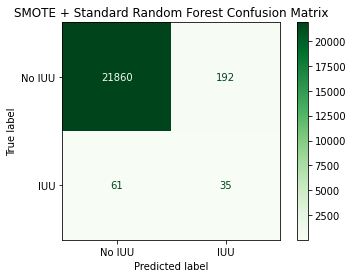

In [ ]:
#Importing essential libraries
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, X, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

#Randomly spilt dataset to test and train set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
#Train SMOTE SRF
SMOTE_SRF.fit(X_train, y_train)
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(X_test)
#Create confusion matrix
fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, display_labels=['No IUU', 'IUU'], cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     22052
           1       0.15      0.36      0.22        96

    accuracy                           0.99     22148
   macro avg       0.58      0.68      0.61     22148
weighted avg       0.99      0.99      0.99     22148



In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the models
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Define the ensemble model
ensemble = VotingClassifier(estimators=[('xgb', xgb), ('rf', rf)], voting='soft')

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

# Evaluate the ensemble model on the test data
score = ensemble.score(X_test, y_test)

print(score)

0.980946360845223


In [ ]:
from sklearn.metrics import classification_report

# Get the predictions for the test set
y_pred = ensemble.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22052
           1       0.12      0.53      0.19        96

    accuracy                           0.98     22148
   macro avg       0.56      0.76      0.59     22148
weighted avg       0.99      0.98      0.99     22148



In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

# Create the base models
rf = RandomForestClassifier(n_estimators=100)
xgb_clf = xgb.XGBClassifier(n_estimators=200)
ann = MLPClassifier(hidden_layer_sizes=(50,50))

# Create the meta-model
meta_model = MLPClassifier(hidden_layer_sizes=(50,50))

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=[('rf', rf), ('xgb', xgb_clf), ('ann', ann)], final_estimator=meta_model)

# Train the classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22052
           1       0.11      0.57      0.19        96

    accuracy                           0.98     22148
   macro avg       0.56      0.78      0.59     22148
weighted avg       0.99      0.98      0.99     22148



In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[21396   621]
 [   23    17]]


In [ ]:
import pandas as pd
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# define pipeline
steps = [('over', SMOTE()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
for scoring in["accuracy", "roc_auc", "precision"]:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    scores = cross_val_score(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    print("Model", scoring, " mean=", scores.mean() , "stddev=", scores.std())

Model accuracy  mean= 0.4239920659424443 stddev= 0.3449167526764049
Model roc_auc  mean= 0.6120986390798796 stddev= 0.04914228023397403
Model precision  mean= 0.006365830573053692 stddev= 0.002017062919734714
